In [349]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.transforms import Affine2D

import warnings
warnings.filterwarnings('ignore')


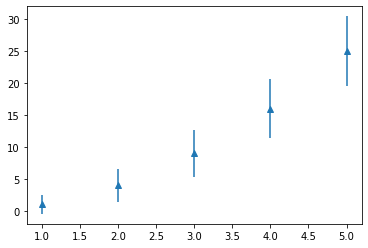

In [5]:
x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()

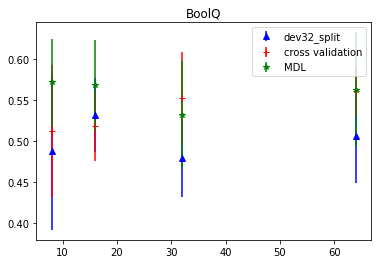

In [19]:
# HP1 

x = np.array([8, 16, 32, 64])
hp1_m_dev32 = np.array([0.4879, 0.532, 0.48, 0.506])
hp1_e_dev32 = np.array([0.0958, 0.0446, 0.0475, 0.0569])

hp1_m_cv = np.array([0.51276, 0.5183, 0.553, 0.561697])
hp1_e_cv = np.array([0.0805,0.0423,0.056,0.029084])

hp1_m_mdl = np.array([0.572, 0.568, 0.532, 0.56307339])
hp1_e_mdl = np.array([0.053,0.055,0.066,0.069738])

plt.errorbar(x, hp1_m_dev32, hp1_e_dev32, linestyle='None', marker='^', color='blue', label='dev32_split')
plt.errorbar(x, hp1_m_cv, hp1_e_cv, linestyle='None', marker='+', color='red', label='cross validation')
plt.errorbar(x, hp1_m_mdl, hp1_e_mdl, linestyle='None', marker='*', color='green', label='MDL')
plt.title('BoolQ')
plt.legend()
plt.show()

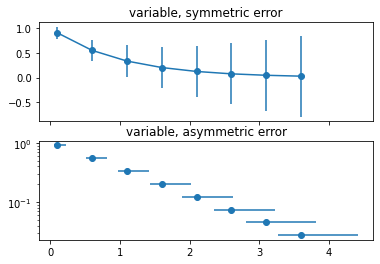

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
# example error bar values that vary with x-position
error = 0.1 + 0.2 * x
# error bar values w/ different -/+ errors
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()


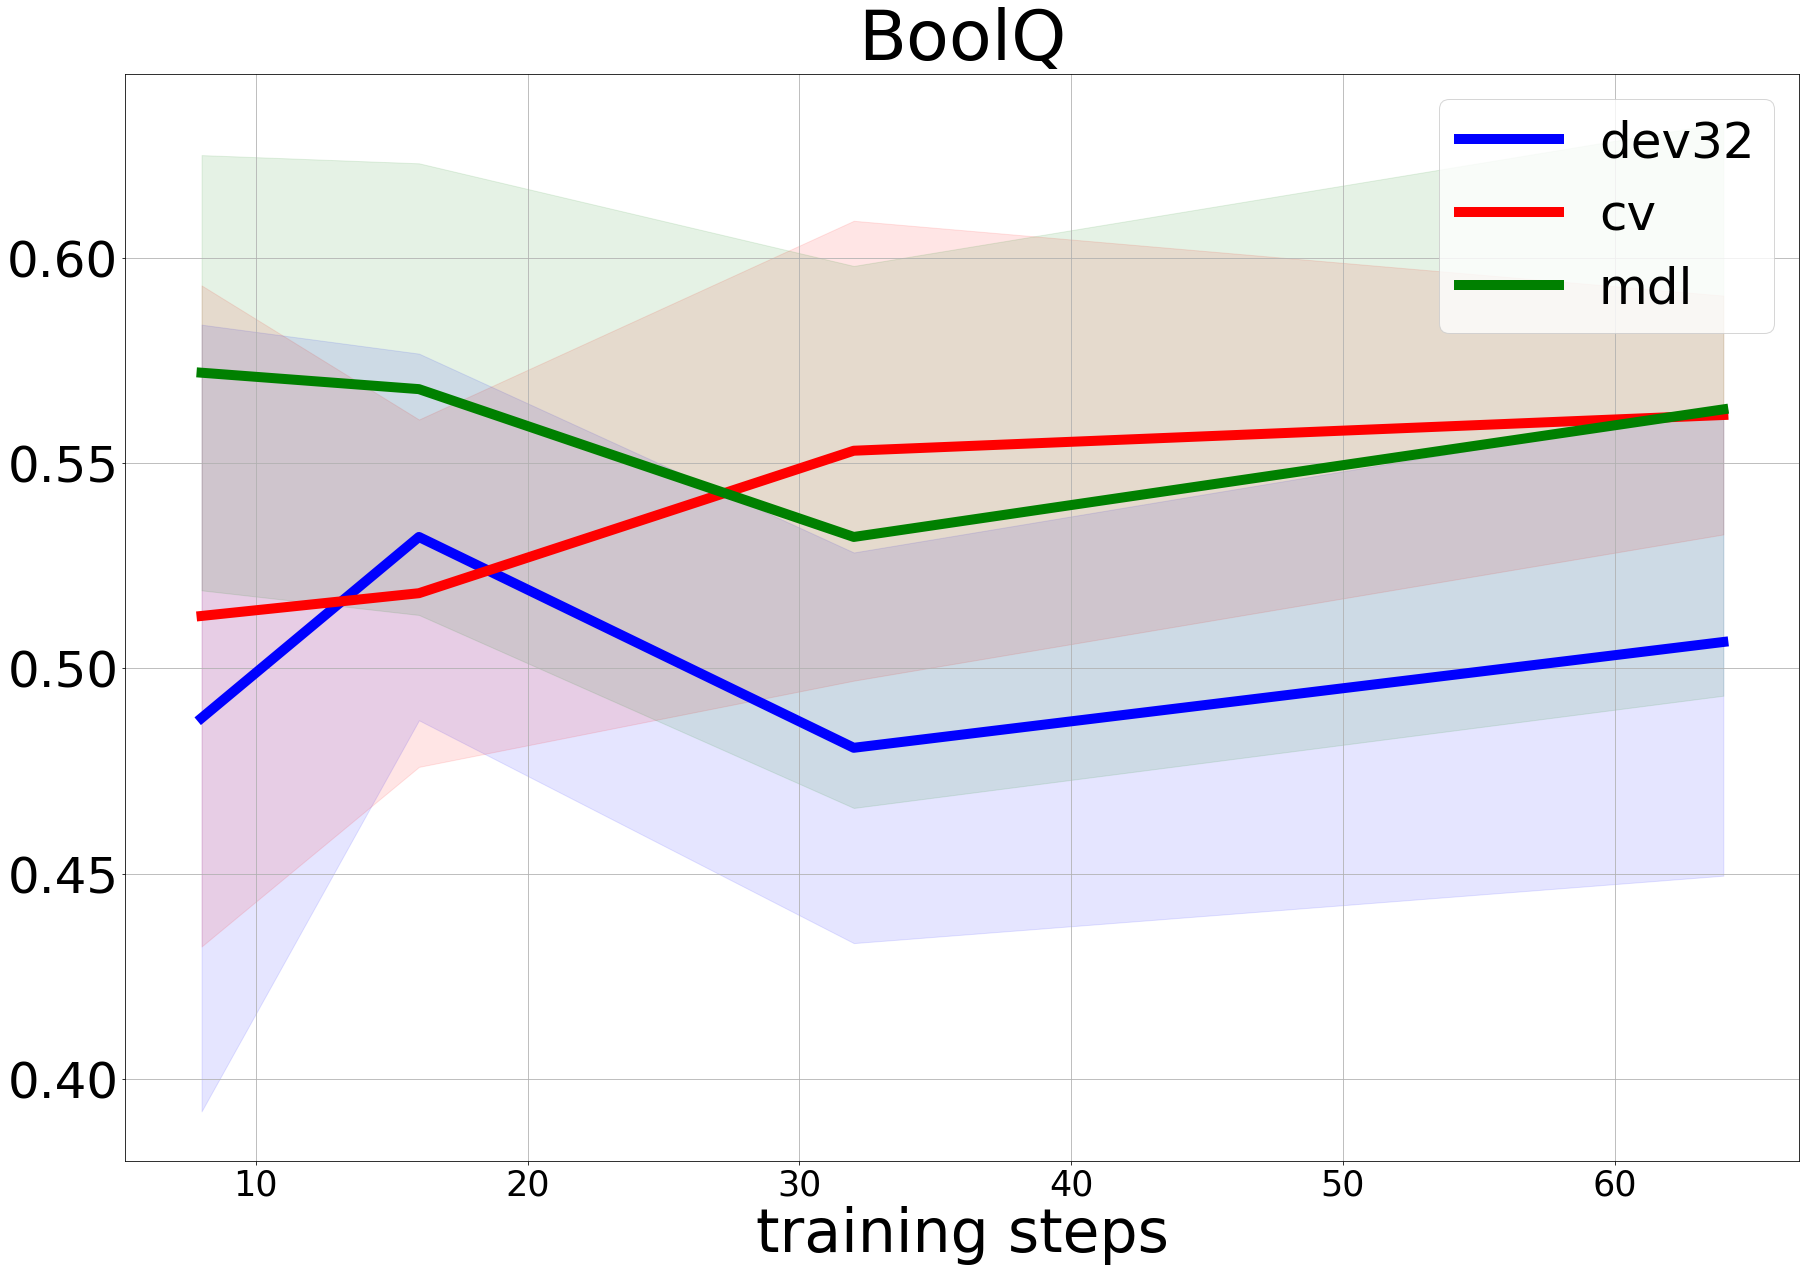

In [43]:
plt.close()
plt.figure(figsize=(30,20))
matplotlib.rcParams.update({'font.size': 35})
LINEWIDTH=10

# indexes = [str(i) for i in range(0,210,10)]
indexes = [8, 16, 32, 64]
# LINEWIDTH=10

hp = 0
mean = dev32['mean'][hp]
std = dev32['std'][hp]
hi = []
low = []
for m, s in zip(mean, std):
    hi.append(m+s)
    low.append(m-s)
plt.plot (indexes, mean, label='dev32', linewidth=LINEWIDTH, color='blue')
plt.fill_between(indexes, low, hi, alpha=.1, color='blue')


hp = 0
mean = cv['mean'][hp]
std = cv['std'][hp]
hi = []
low = []
for m, s in zip(mean, std):
    hi.append(m+s)
    low.append(m-s)
plt.plot (indexes, mean, label='cv', linewidth=LINEWIDTH, color='red')
plt.fill_between(indexes, low, hi, alpha=.1, color='red')


hp = 0
mean = mdl['mean'][hp]
std = mdl['std'][hp]
hi = []
low = []
for m, s in zip(mean, std):
    hi.append(m+s)
    low.append(m-s)
plt.plot (indexes, mean, label='mdl', linewidth=LINEWIDTH, color='green')
plt.fill_between(indexes, low, hi, alpha=.1, color='green')


plt.legend(loc="upper right", fontsize=50)
plt.xlabel('training steps', fontsize=60)
plt.title("BoolQ", fontsize=70)
plt.xticks(fontsize=35)
plt.yticks(fontsize=50)

plt.grid()

In [373]:


def plot_hyperparams(dev32, cv, mdl):
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, sharey=True, figsize=(30,8))
    hp=0

    trans1 = Affine2D().translate(0.0, 0.0) + ax0.transData
    trans2 = Affine2D().translate(-0.1, 0.0) + ax0.transData
    trans3 = Affine2D().translate(+0.1, 0.0) + ax0.transData
    er1 = ax0.errorbar(x, dev32['mean'][hp], yerr=dev32['std'][hp], label='multisplit', marker='o', fmt='o', color='blue', linewidth=LINEWIDTH, linestyle='none', transform=trans1)
    er2 = ax0.errorbar(x, cv['mean'][hp], yerr=cv['std'][hp], label='cv', marker='o', fmt='o', color='red', linewidth=LINEWIDTH, linestyle='none', transform=trans2)
    er3 = ax0.errorbar(x, mdl['mean'][hp], yerr=mdl['std'][hp], label='mdl', marker='o', fmt='o', color='green', linewidth=LINEWIDTH, linestyle='none', transform=trans3)
    ax0.set_title(f"{TASK}, HP1")
    ax0.set_xlabel('# shots')
    # ax0.legend(loc="upper right")
    # plt.show()
    ax0.grid()


    hp=1
    trans1 = Affine2D().translate(0.0, 0.0) + ax1.transData
    trans2 = Affine2D().translate(-0.1, 0.0) + ax1.transData
    trans3 = Affine2D().translate(+0.1, 0.0) + ax1.transData
    er1 = ax1.errorbar(x, dev32['mean'][hp], yerr=dev32['std'][hp], label='multisplit', marker='o', fmt='o', color='blue', linewidth=LINEWIDTH, linestyle='none', transform=trans1)
    er2 = ax1.errorbar(x, cv['mean'][hp], yerr=cv['std'][hp], label='cv', marker='o', fmt='o', color='red', linewidth=LINEWIDTH, linestyle='none', transform=trans2)
    er3 = ax1.errorbar(x, mdl['mean'][hp], yerr=mdl['std'][hp], label='mdl', marker='o', fmt='o', color='green', linewidth=LINEWIDTH, linestyle='none', transform=trans3)
    ax1.set_title(f"{TASK}, HP2")
    ax1.set_xlabel('# shots')
    # ax1.legend(loc="upper right")
    # plt.show()
    ax1.grid()

    hp=2
    trans1 = Affine2D().translate(0.0, 0.0) + ax2.transData
    trans2 = Affine2D().translate(-0.1, 0.0) + ax2.transData
    trans3 = Affine2D().translate(+0.1, 0.0) + ax2.transData
    er1 = ax2.errorbar(x, dev32['mean'][hp], yerr=dev32['std'][hp], label='multisplit', marker='o', fmt='o', color='blue', linewidth=LINEWIDTH, linestyle='none', transform=trans1)
    er2 = ax2.errorbar(x, cv['mean'][hp], yerr=cv['std'][hp], label='cv', marker='o', fmt='o', color='red', linewidth=LINEWIDTH, linestyle='none', transform=trans2)
    er3 = ax2.errorbar(x, mdl['mean'][hp], yerr=mdl['std'][hp], label='mdl', marker='o', fmt='o', color='green', linewidth=LINEWIDTH, linestyle='none', transform=trans3)
    ax2.set_title(f"{TASK}, HP3")
    ax2.set_xlabel('# shots')
    # ax2.legend(loc="upper right")
    # plt.show()
    ax2.grid()

    hp=3
    trans1 = Affine2D().translate(0.0, 0.0) + ax3.transData
    trans2 = Affine2D().translate(-0.1, 0.0) + ax3.transData
    trans3 = Affine2D().translate(+0.1, 0.0) + ax3.transData
    er1 = ax3.errorbar(x, dev32['mean'][hp], yerr=dev32['std'][hp], label='multisplit', marker='o', fmt='o', color='blue', linewidth=LINEWIDTH, linestyle='none', transform=trans1)
    er2 = ax3.errorbar(x, cv['mean'][hp], yerr=cv['std'][hp], label='cv', marker='o', fmt='o', color='red', linewidth=LINEWIDTH, linestyle='none', transform=trans2)
    er3 = ax3.errorbar(x, mdl['mean'][hp], yerr=mdl['std'][hp], label='mdl', marker='o', fmt='o', color='green', linewidth=LINEWIDTH, linestyle='none', transform=trans3)
    ax3.set_title(f"{TASK}, HP4")
    ax3.legend(loc="lower left")
    ax3.set_xlabel('# shots')

    # plt.show()ac
    ax3.grid()
    return



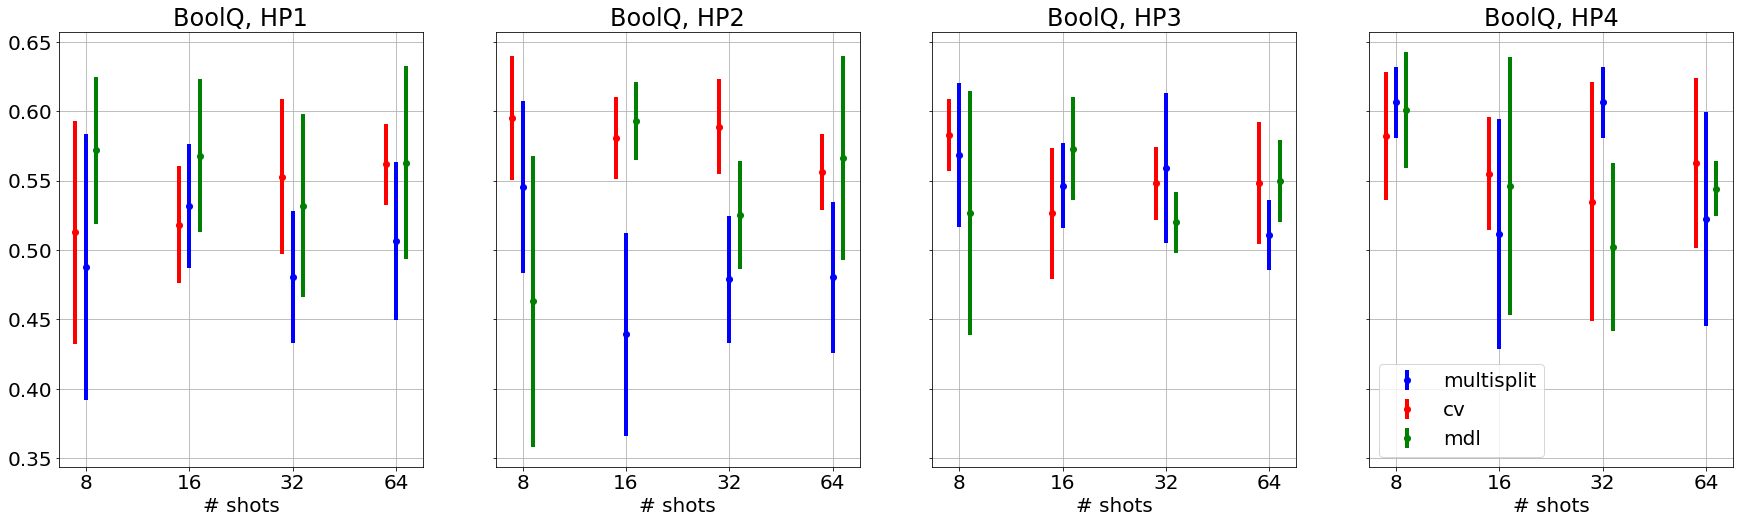

In [375]:
# BoolQ

TASK="BoolQ"

# plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size':20})
LINEWIDTH=4

x = ['8', '16', '32', '64']

dev32 = {
    'mean': [[0.4879, 0.532, 0.48065, 0.506422],
             [0.5454, 0.43922, 0.4788, 0.48035],
             [0.5686, 0.5464, 0.559, 0.510856],
             [0.6064, 0.5119, 0.6064, 0.5225535]],
    'std': [[0.0958,0.04465,0.04757,0.056919],
            [0.06201,0.07297,0.0461,0.0543496],
            [0.05185,0.03084,0.054,0.025548],
            [0.02575,0.0829,0.02575,0.07731036]
           ]
}

cv = {
        'mean': [
            [0.51276, 0.5183, 0.553, 0.561697],
            [0.5954, 0.5808, 0.589, 0.5561927],
            [0.583, 0.5264, 0.548, 0.548471],
            [0.582, 0.5551, 0.535, 0.5626911]
        ],
    'std': [
        [0.0805,0.0423,0.056,0.029084],
        [0.0446,0.0298,0.034,0.027265],
        [0.026,0.0475,0.026,0.0440519],
        [0.046,0.0409,0.086,0.061017]
           ]
}

mdl = {
    'mean': [
        [0.572, 0.568, 0.532, 0.56307339],
        [0.463, 0.593, 0.525, 0.566513],
        [0.527, 0.573, 0.52, 0.549694],
        [0.601, 0.546, 0.502, 0.544266]
    ],
    
    'std': [
        [0.053,0.055,0.066,0.069738],
        [0.105,0.028,0.039,0.0736753],
        [0.088,0.037,0.022,0.029377],
        [0.042,0.093,0.0607,0.0198083]
    ]
}

plot_hyperparams(dev32, cv, mdl)

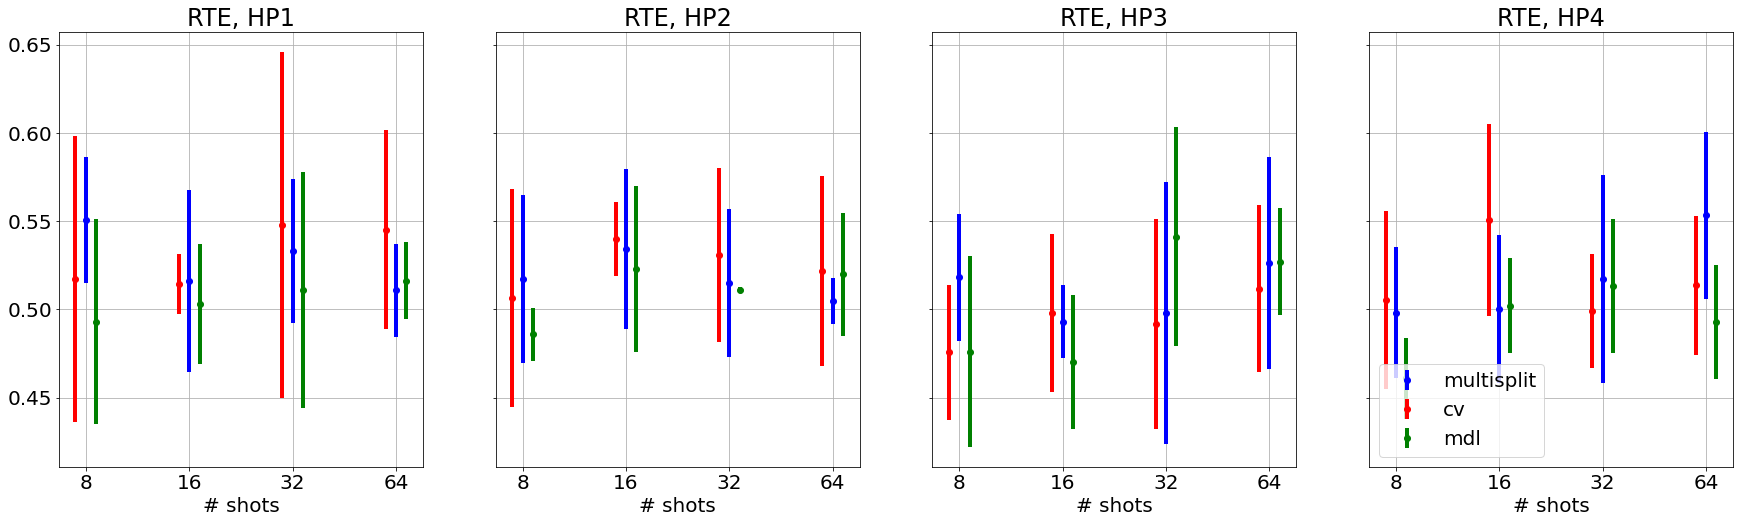

In [376]:
# RTE
TASK = "RTE"

# plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size':20})
LINEWIDTH=4

x = ['8', '16', '32', '64']

dev32 = {
    'mean': [
        [0.5505, 0.5162, 0.533, 0.51083],
        [0.5171, 0.5342, 0.515, 0.504512],
        [0.5181, 0.493, 0.498, 0.526173],
        [0.4981, 0.5, 0.517, 0.553249]
    ],
    'std': [
        [0.0356,0.05156,0.041,0.0264467],
        [0.0475,0.0451,0.042,0.01297],
        [0.03614,0.0207,0.074,0.05987],
        [0.03716,0.042,0.059,0.04747],
           ]
}

cv = {
        'mean': [
        [0.5171, 0.5144, 0.5478, 0.545126],
        [0.5063, 0.5397, 0.5306, 0.52166],
        [0.4756, 0.4981, 0.4918, 0.511732],
        [0.5054, 0.5505, 0.499, 0.513537],    
        ],
    'std': [
        [0.0812,0.0168,0.09813,0.056314],
        [0.0619,0.0209,0.0492,0.053749],
        [0.0382,0.0448,0.0595,0.047196],
        [0.0504,0.0544,0.0323,0.03925],
           ]
}

mdl = {
    'mean': [
        [0.493, 0.503, 0.511, 0.516245],
        [0.486, 0.523, 0.511, 0.519855],
        [0.476, 0.47, 0.541, 0.52707],
        [0.461, 0.502, 0.513, 0.492779]
    ],
    
    'std': [
        [0.058,0.034,0.0669,0.02166],
        [0.015,0.047,0.0018,0.03487],
        [0.054,0.038,0.062,0.03006],
        [0.023,0.027,0.038,0.032087]
    ]
}

plot_hyperparams(dev32, cv, mdl)

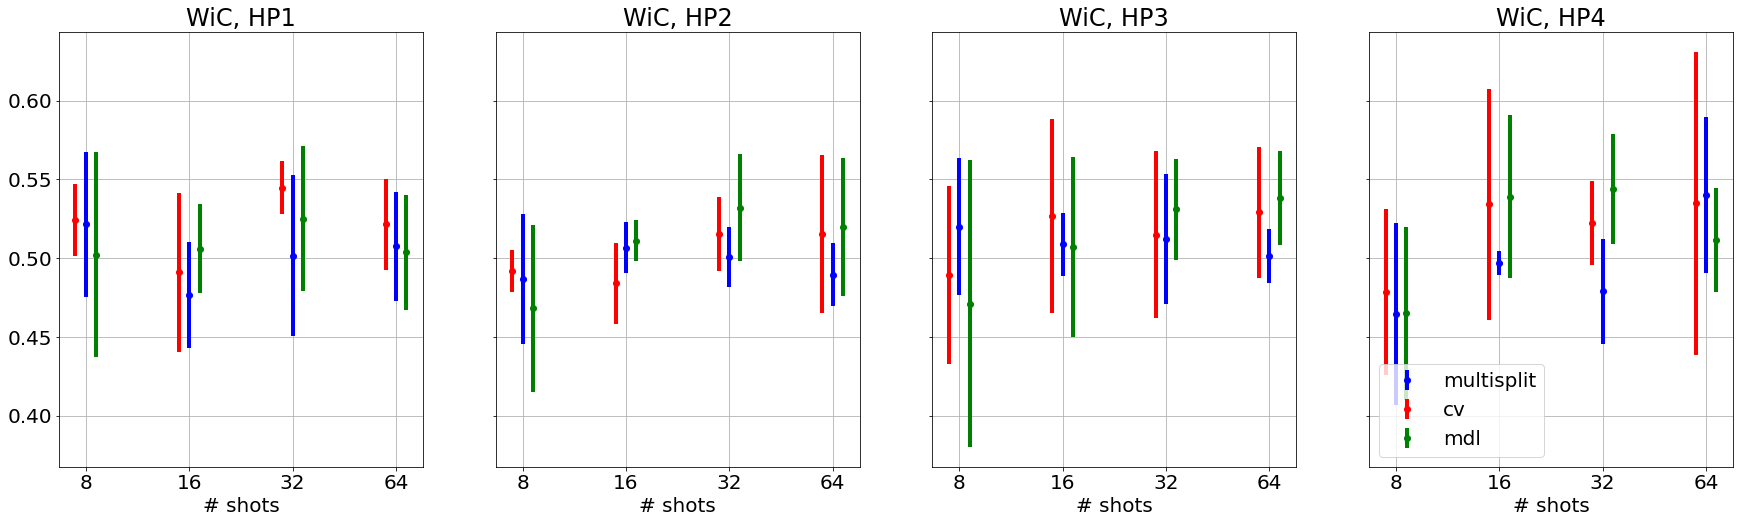

In [377]:
# WiC


# plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size':20})
LINEWIDTH=4
TASK = 'WiC'

x = ['8', '16', '32', '64']

dev32 = {
    'mean': [
        [0.52155, 0.4764, 0.50156, 0.50744],
        [0.4866, 0.5066, 0.5007, 0.48942],
        [0.51998, 0.5086, 0.5121, 0.5011755],
        [0.4647, 0.4968, 0.4788, 0.539968]
    ],
    'std': [
        [0.04598,0.0338,0.0511,0.03444],
        [0.0413,0.01605,0.01908,0.02],
        [0.04336,0.01972,0.041,0.016947],
        [0.05778,0.00778,0.0332,0.049788]
           ]
}

cv = {
        'mean': [
            [0.5242, 0.4909, 0.5446, 0.52155],
            [0.4917, 0.4839, 0.5152, 0.51528],
            [0.4894, 0.5266, 0.5148, 0.528905],
            [0.4784, 0.5341, 0.5223, 0.53487]
        ],
    'std': [
        [0.023,0.0505,0.0167,0.0288836],
        [0.0135,0.0257,0.0234,0.0499],
        [0.0566,0.0618,0.053,0.041889],
        [0.0528,0.0735,0.0268,0.09613]
           ]
}

mdl = {
    'mean': [
        [0.502, 0.506, 0.525, 0.503526],
        [0.468, 0.511, 0.532, 0.519592],
        [0.471, 0.507, 0.531, 0.538009],
        [0.465, 0.539, 0.544, 0.5113636]
    ],
    
    'std': [
        [0.065,0.028,0.046,0.036318],
        [0.053,0.013,0.034,0.0436345],
        [0.091,0.057,0.032,0.029722],
        [0.055,0.052,0.035,0.03318]
    ]
}

plot_hyperparams(dev32, cv, mdl)

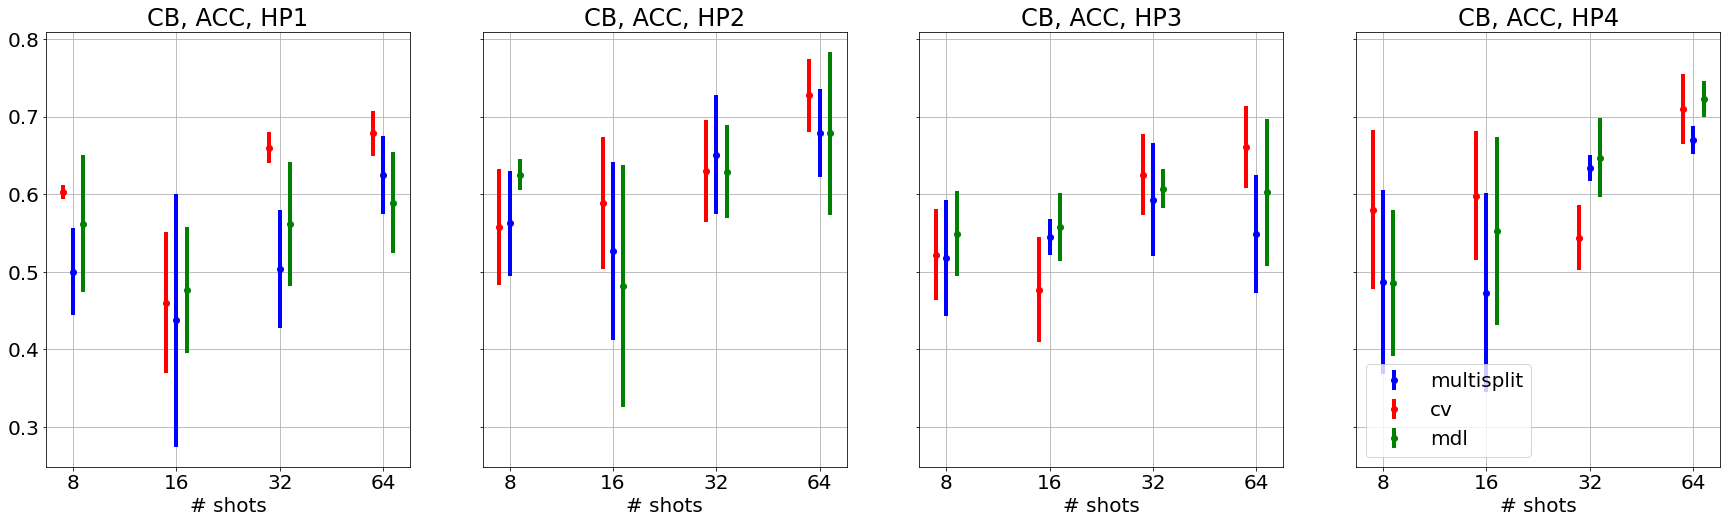

In [378]:
# CB


# plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size':20})
LINEWIDTH=4
TASK = 'CB, ACC'

x = ['8', '16', '32', '64']

dev32 = {
    'mean': [
        [0.5, 0.4375, 0.504, 0.625],
        [0.5625, 0.5267, 0.651, 0.678571],
        [0.5178, 0.5446, 0.593, 0.5491],
        [0.4866, 0.4732, 0.6339, 0.669642]
    ],
    'std': [
        [0.056,0.1633,0.076,0.0505],
        [0.0676,0.115,0.077,0.05646],
        [0.0743,0.023,0.073,0.07628],
        [0.1187,0.1283,0.017,0.01785]
           ]
}

cv = {
        'mean': [
            [0.6026, 0.46, 0.66, 0.678571],
            [0.558, 0.589, 0.63, 0.727678],
            [0.5223, 0.477, 0.625, 0.660714],
            [0.58, 0.598, 0.544, 0.709821]
        ],
    'std': [
        [0.0089,0.091,0.02,0.02916],
        [0.0748,0.085,0.066,0.04696],
        [0.059,0.068,0.052,0.05257],
        [0.1025,0.083,0.042,0.04464]
           ]
}

mdl = {
    'mean': [
        [0.562, 0.477, 0.562, 0.589285],
        [0.625, 0.482, 0.629, 0.678571],
        [0.549, 0.558, 0.607, 0.6026],
        [0.486, 0.553, 0.647, 0.72321]
    ],
    
    'std': [
        [0.088,0.081,0.08,0.065205],
        [0.02,0.156,0.06,0.10514],
        [0.055,0.044,0.025,0.094912],
        [0.094,0.121,0.051,0.02305]
    ]
}

plot_hyperparams(dev32, cv, mdl)

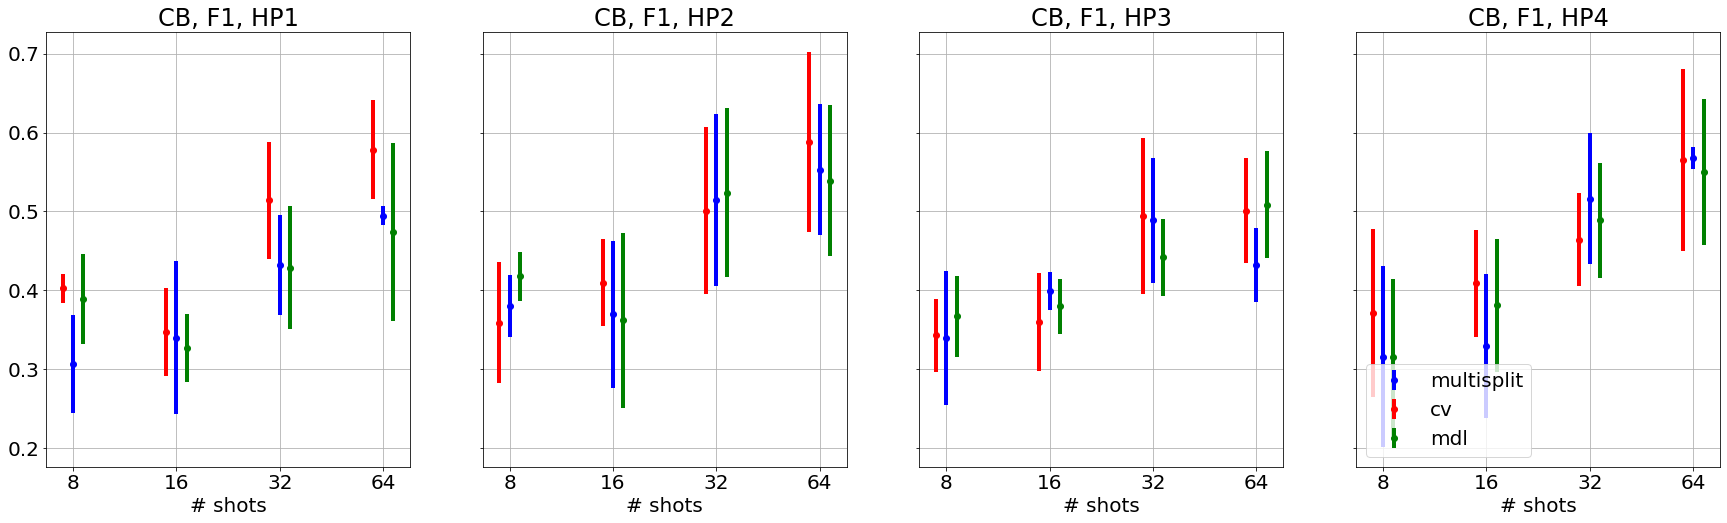

In [379]:
# CB


# plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size':20})
LINEWIDTH=4
TASK = 'CB, F1'

x = ['8', '16', '32', '64']

dev32 = {
    'mean': [
        [0.3063, 0.34, 0.432, 0.49453],
        [0.38, 0.3695, 0.514, 0.553128],
        [0.34, 0.3994, 0.489, 0.431842],
        [0.316, 0.3298, 0.516, 0.567186]
    ],
    'std': [
        [0.0623,0.097,0.063,0.01197],
        [0.039,0.0926,0.109,0.08297],
        [0.085,0.024,0.079,0.046727],
        [0.1145,0.0912,0.083,0.013902]
           ]
}

cv = {
        'mean': [
            [0.4024, 0.347, 0.514, 0.578328],
            [0.359, 0.41, 0.501, 0.587979],
            [0.343, 0.36, 0.494, 0.500871],
            [0.3713, 0.409, 0.464, 0.565525]
        ],
    'std': [
        [0.019,0.056,0.074,0.06264],
        [0.0764,0.055,0.106,0.114517],
        [0.046,0.062,0.099,0.06676],
        [0.1061,0.068,0.059,0.11545]
           ]
}

mdl = {
    'mean': [
        [0.389, 0.327, 0.429, 0.474296],
        [0.418, 0.362, 0.524, 0.53881],
        [0.367, 0.38, 0.442, 0.508739],
        [0.315, 0.381, 0.489, 0.549991]
    ],
    
    'std': [
        [0.057,0.043,0.078,0.112842],
        [0.031,0.111,0.107,0.09572],
        [0.051,0.035,0.049,0.06784],
        [0.099,0.084,0.073,0.0926]
    ]
}

plot_hyperparams(dev32, cv, mdl)

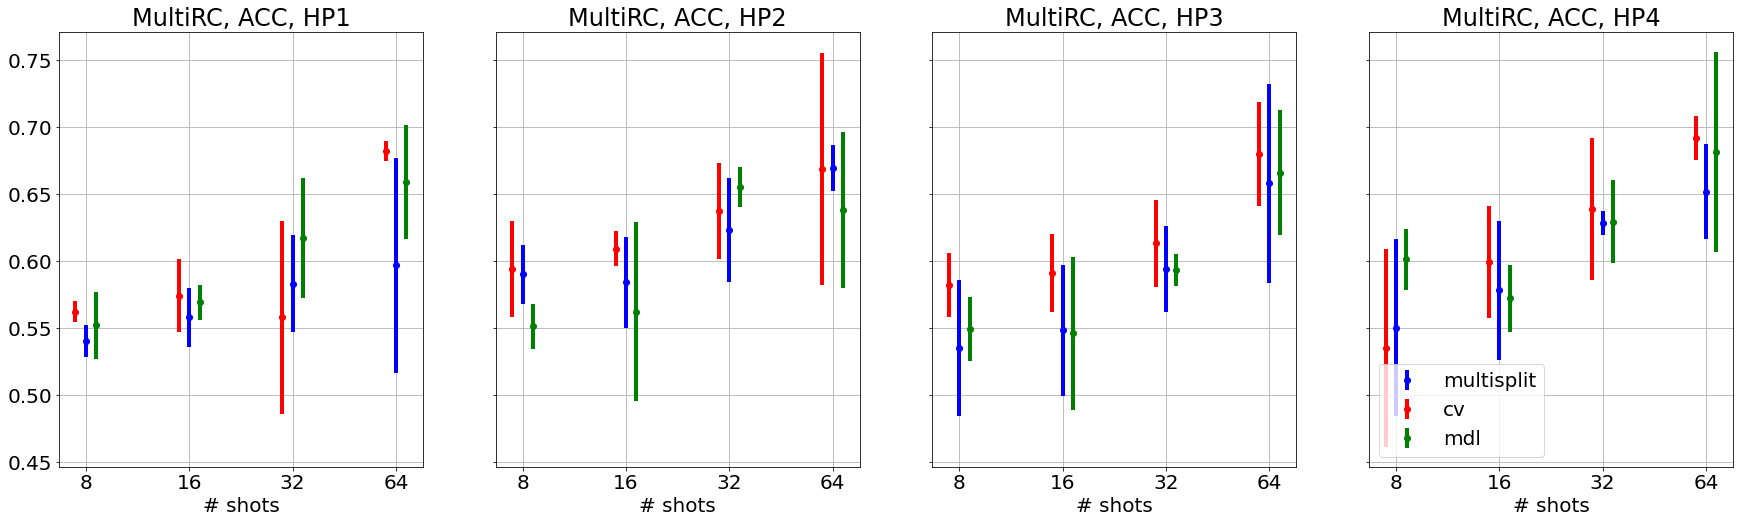

In [380]:
# MultiRC, ACC


# plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size':20})
LINEWIDTH=4
TASK = 'MultiRC, ACC'

x = ['8', '16', '32', '64']

dev32 = {
    'mean': [
        [0.54, 0.558, 0.583, 0.5965],
        [0.59, 0.584, 0.623, 0.66955],
        [0.535, 0.548, 0.594, 0.6579],
        [0.55, 0.578, 0.628, 0.65155]
    ],
    'std': [
        [0.012,0.022,0.036,0.08031],
        [0.022,0.034,0.039,0.0172],
        [0.051,0.049,0.032,0.0744],
        [0.066,0.052,0.009,0.035401]
           ]
}

cv = {
        'mean': [
            [0.562, 0.574, 0.558, 0.68201],
            [0.594, 0.609, 0.637, 0.668213],
            [0.582, 0.591, 0.613, 0.6798],
            [0.535, 0.599, 0.639, 0.6916]
        ],
    'std': [
        [0.008,0.027,0.072,0.00769],
        [0.036,0.013,0.036,0.08659],
        [0.024,0.029,0.0326,0.03877],
        [0.074,0.0419,0.053,0.01651]
           ]
}

mdl = {
    'mean': [
        [0.552, 0.569, 0.617, 0.6585],
        [0.551, 0.562, 0.655, 0.6379],
        [0.549, 0.546, 0.593, 0.6659],
        [0.601, 0.572, 0.629, 0.6812]
    ],
    
    'std': [
        [0.025,0.013,0.045,0.0426],
        [0.017,0.067,0.015,0.0581],
        [0.024,0.057,0.012,0.0466],
        [0.023,0.025,0.031,0.07488]
    ]
}

plot_hyperparams(dev32, cv, mdl)

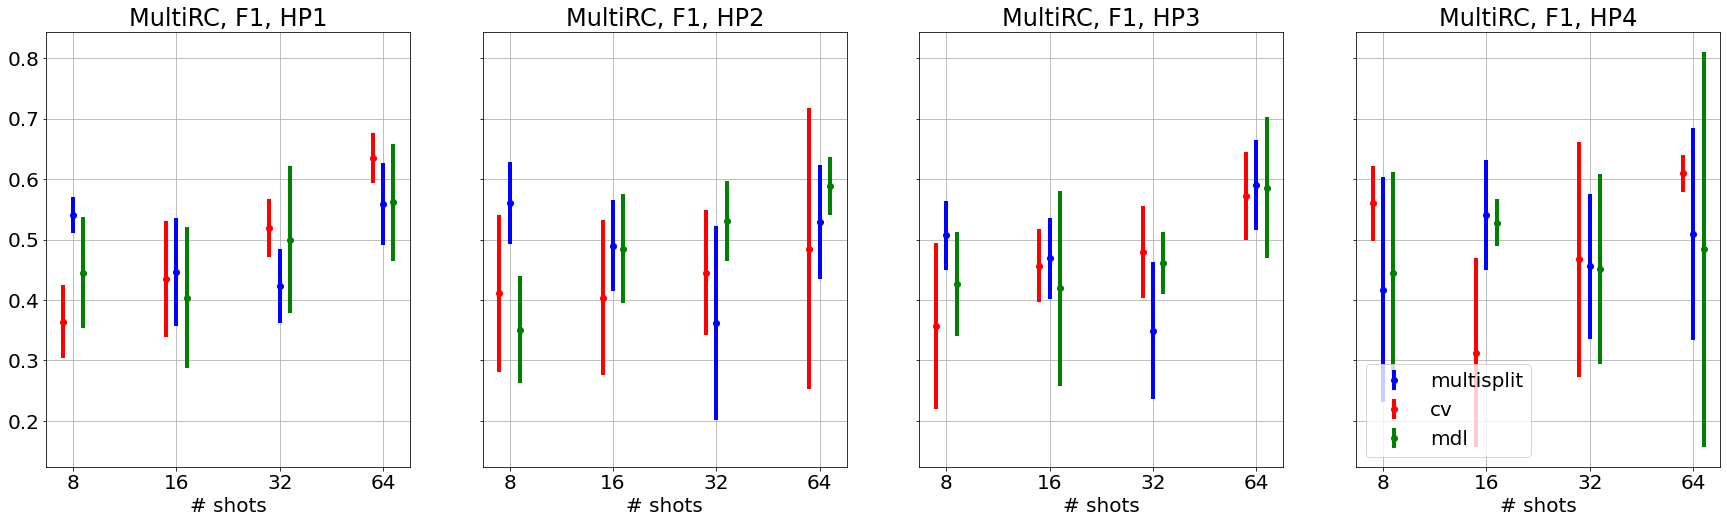

In [381]:
# MultiRC, F1


# plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size':20})
LINEWIDTH=4
TASK = 'MultiRC, F1'

x = ['8', '16', '32', '64']

dev32 = {
    'mean': [
        [0.54, 0.446, 0.423, 0.5589],
        [0.56, 0.49, 0.362, 0.528734],
        [0.507, 0.469, 0.349, 0.59045],
        [0.417, 0.541, 0.456, 0.5095]
    ],
    'std': [
        [0.03, 0.089, 0.061, 0.06789],
        [0.068, 0.075, 0.16, 0.093757],
        [0.057, 0.067, 0.113, 0.0744],
        [0.186, 0.0907, 0.12, 0.1755]
           ]
}

cv = {
        'mean': [
            [0.364, 0.434, 0.519, 0.6353],
            [0.411, 0.404, 0.445, 0.4851],
            [0.357, 0.457, 0.48, 0.5721],
            [0.5599, 0.313, 0.467, 0.6093]
        ],
    'std': [
        [0.06, 0.096, 0.048, 0.041415],
        [0.13, 0.128, 0.103, 0.2329],
        [0.138, 0.06, 0.076, 0.0726],
        [0.062, 0.156, 0.195, 0.03025]
           ]
}

mdl = {
    'mean': [
        [0.445, 0.404, 0.5, 0.5618],
        [0.351, 0.485, 0.53, 0.5884],
        [0.427, 0.419, 0.461, 0.5858],
        [0.445, 0.528, 0.451, 0.4837]
    ],
    
    'std': [
        [0.0921, 0.117, 0.122, 0.0967],
        [0.088, 0.09, 0.066, 0.0482],
        [0.086, 0.162, 0.0508, 0.1169],
        [0.166, 0.039, 0.157, 0.327]
    ]
}

plot_hyperparams(dev32, cv, mdl)

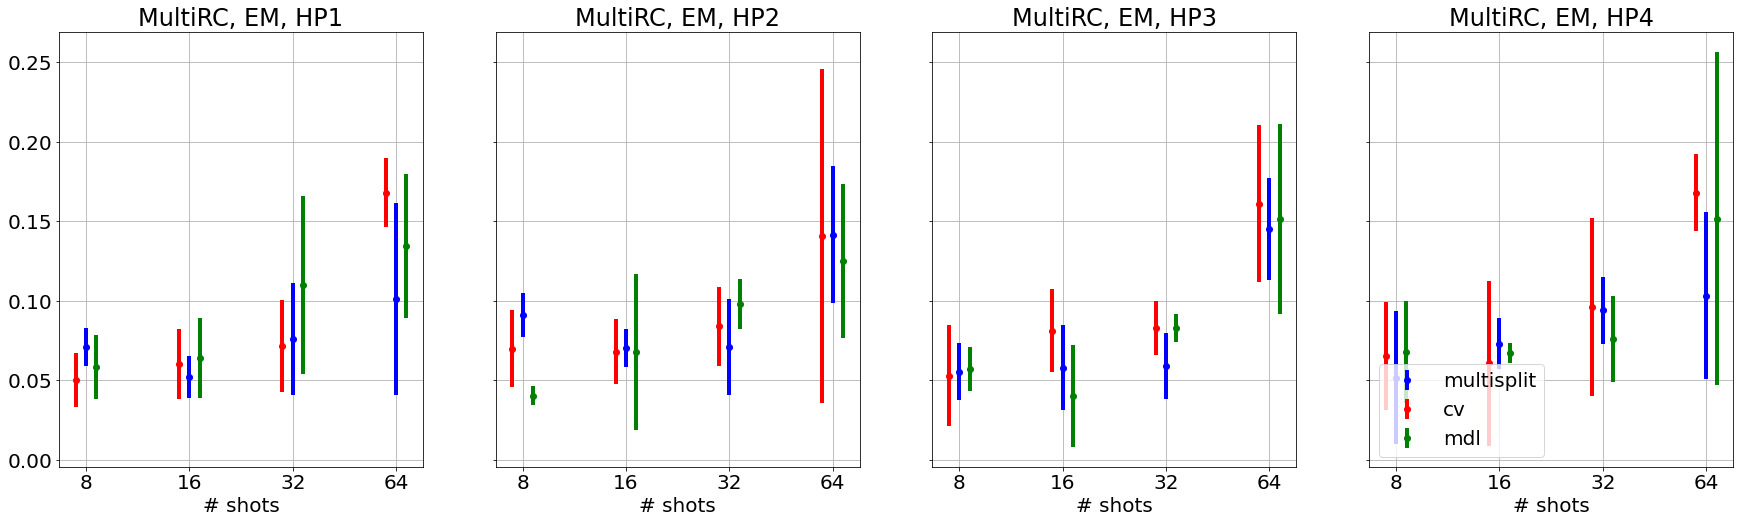

In [382]:
# MultiRC, EM


# plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size':20})
LINEWIDTH=4
TASK = 'MultiRC, EM'

x = ['8', '16', '32', '64']

dev32 = {
    'mean': [
        [0.071, 0.052, 0.076, 0.101259],
        [0.091, 0.0705, 0.071, 0.141658],
        [0.0553, 0.058, 0.059, 0.14533],
        [0.0516, 0.0729, 0.094, 0.103095]
    ],
    'std': [
        [0.012, 0.013, 0.035, 0.06041],
        [0.014, 0.012, 0.03, 0.04322],
        [0.018, 0.027, 0.0206, 0.0319],
        [0.042, 0.016, 0.021, 0.05255]
           ]
}

cv = {
        'mean': [
            [0.05, 0.0605, 0.0716, 0.16815],
            [0.07, 0.068, 0.084, 0.1411],
            [0.053, 0.0813, 0.083, 0.16107],
            [0.065, 0.0608, 0.096, 0.1681]
        ],
    'std': [
        [0.017, 0.022, 0.029, 0.02178],
        [0.024, 0.0203, 0.025, 0.1051],
        [0.032, 0.026, 0.017, 0.0495],
        [0.034, 0.052, 0.056, 0.0243]
           ]
}

mdl = {
    'mean': [
        [0.0584, 0.064, 0.11, 0.1345],
        [0.0403, 0.068, 0.098, 0.1251],
        [0.057, 0.04, 0.083, 0.1513],
        [0.068, 0.067, 0.076, 0.1518]
    ],
    
    'std': [
        [0.02, 0.025, 0.056, 0.0454],
        [0.006, 0.049, 0.016, 0.0483],
        [0.014, 0.032, 0.0087, 0.0597],
        [0.032, 0.0064, 0.027, 0.105]
    ]
}

plot_hyperparams(dev32, cv, mdl)

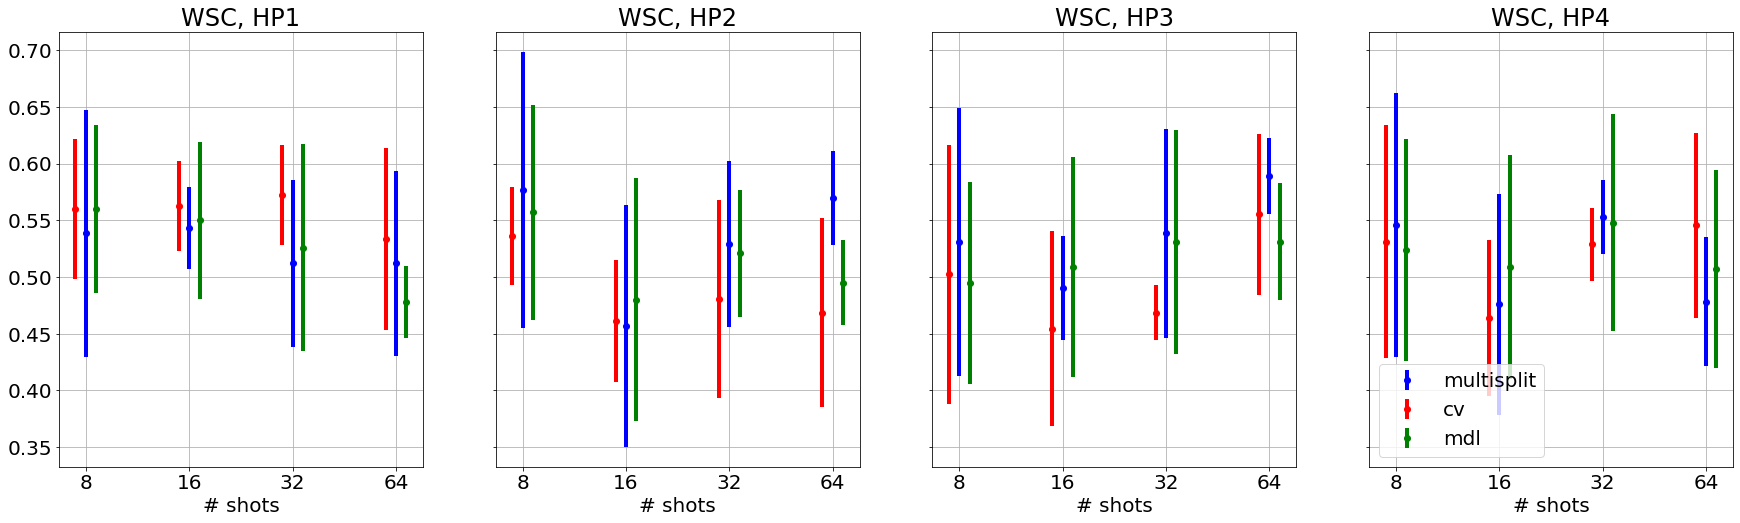

In [383]:
# WSC


# plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size':20})
LINEWIDTH=4
TASK = 'WSC'

x = ['8', '16', '32', '64']

dev32 = {
    'mean': [
        [0.5384, 0.5432, 0.512, 0.512],
        [0.5769, 0.4567, 0.5288, 0.5697],
        [0.5312, 0.4903, 0.5384, 0.5889],
        [0.5456, 0.4759, 0.5528, 0.4783]
    ],
    'std': [
        [0.109,0.0364,0.0733,0.0817],
        [0.1218,0.1066,0.0732,0.0418],
        [0.1181,0.0457,0.0925,0.0336],
        [0.1165,0.0975,0.0328,0.0568]
           ]
}

cv = {
        'mean': [
            [0.56, 0.5625, 0.5721, 0.5336],
            [0.536, 0.4615, 0.4807, 0.4687],
            [0.5024, 0.4543, 0.4687, 0.5552],
            [0.5312, 0.4639, 0.5288, 0.5456]
        ],
    'std': [
        [0.062,0.0396,0.044,0.08025],
        [0.0432,0.0538,0.087,0.08322],
        [0.1141,0.086,0.024,0.0708],
        [0.1027,0.069,0.0323,0.0813]
           ]
}

mdl = {
    'mean': [
        [0.56, 0.55, 0.526, 0.4783],
        [0.557, 0.48, 0.521, 0.4951],
        [0.495, 0.509, 0.531, 0.5312],
        [0.524, 0.509, 0.548, 0.5072]
    ],
    
    'std': [
        [0.074,0.069,0.091,0.0317],
        [0.095,0.107,0.056,0.0372],
        [0.089,0.097,0.099,0.0517],
        [0.098,0.099,0.096,0.0872]
    ]
}

plot_hyperparams(dev32, cv, mdl)

Text(0.5, 1.0, 'WiC')

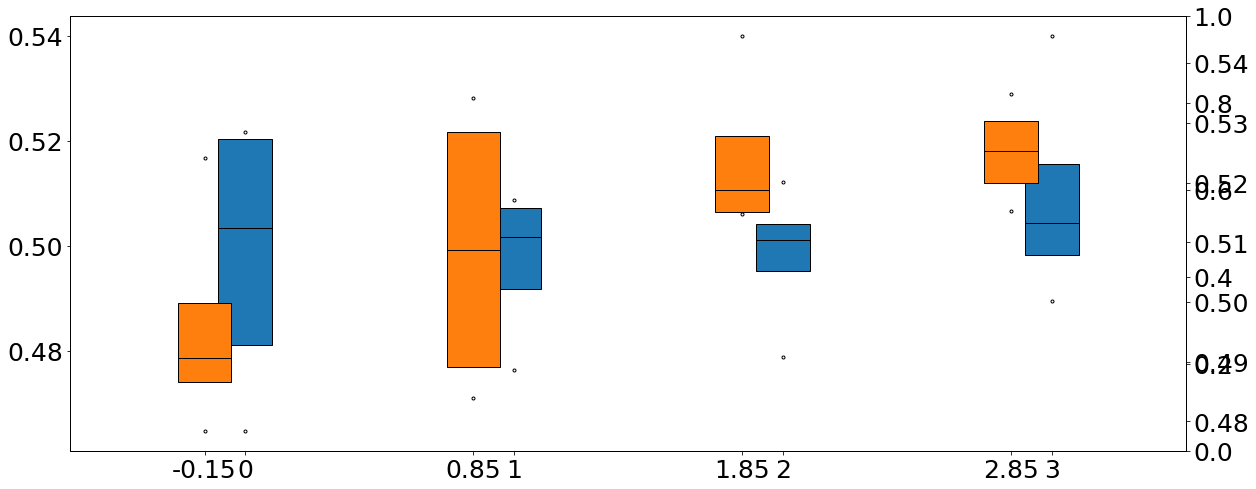

In [359]:
# WiC

matplotlib.rcParams.update({'font.size':25})

wic = {
    'dev32': {
            '8': {
                'mean': [0.52155, 0.4866, 0.51998, 0.4647],
                'std': [0.04598, 0.0413, 0.04336, 0.05778]
            },
            '16': {
                'mean': [0.4764, 0.5066, 0.5086, 0.4968],
                'std': [0.0338, 0.01605, 0.01972, 0.00778]
            },

            '32': {
                'mean': [0.50156, 0.5007, 0.5121, 0.4788],
                'std': [0.0511, 0.01908, 0.041, 0.0332]
            },
            '64': {
                'mean': [0.50744, 0.48942, 0.5011755, 0.539968],
                'std': [0.03444, 0.02, 0.016947, 0.049788]
            }
    },
    
    'cv': {
            '8': {
                'mean': [0.5242, 0.4917, 0.4894, 0.4784],
                'std': []
            },
            '16': {
                'mean': [0.4909, 0.4839, 0.5266, 0.5341],
                'std': []
            },

            '32': {
                'mean': [0.5446, 0.5152, 0.5148, 0.5223],
                'std': []
            },
            '64': {
                'mean': [0.52155, 0.51528, 0.528905, 0.53487],
                'std': []
            }
    },
    
    'mdl': {
            '8': {
                'mean': [0.502, 0.468, 0.471, 0.465],
                'std': []
            },
            '16': {
                'mean': [0.506, 0.511, 0.507, 0.539],
                'std': []
            },

            '32': {
                'mean': [0.525, 0.532, 0.531, 0.544],
                'std': []
            },
            '64': {
                'mean': [0.503526, 0.519592, 0.538009, 0.5113636],
                'std': []
            }
    }
    

}

fig1, ax1 = plt.subplots(figsize=(20,8))
# ax1.boxplot([wic['dev32']['8']['mean'], wic['cv']['8']['mean'], wic['mdl']['8']['mean'], 
#              wic['dev32']['16']['mean'], wic['cv']['16']['mean'], wic['mdl']['16']['mean'],
#              wic['dev32']['32']['mean'], wic['cv']['32']['mean'], wic['mdl']['32']['mean'], 
#              wic['dev32']['64']['mean'], wic['cv']['64']['mean'], wic['mdl']['64']['mean'], 
#             ], 
#             positions=[8, 9, 10, 16, 17, 18, 32,33,34, 64,65,66])

box_param = dict(whis=(5, 95), widths=0.2, patch_artist=True,
                 flierprops=dict(marker='.', markeredgecolor='black',
                 fillstyle=None), medianprops=dict(color='black'))

space = 0.15
nb_groups = 4
ax1.boxplot([wic['dev32']['8']['mean'], 
             wic['dev32']['16']['mean'], 
             wic['dev32']['32']['mean'], 
             wic['dev32']['64']['mean'], 
            ],
           positions=np.arange(nb_groups), 
            boxprops=dict(facecolor='tab:blue'), **box_param)
#             positions=[8, 9, 10, 16, 17, 18, 32,33,34, 64,65,66])

ax2 = ax1.twinx()
ax2.boxplot([wic['cv']['8']['mean'], 
             wic['cv']['16']['mean'], 
             wic['cv']['32']['mean'], 
             wic['cv']['64']['mean'], 
            ],
           positions=np.arange(nb_groups)-space, 
            boxprops=dict(facecolor='tab:orange'), **box_param)

a3 = ax1.twinx()
ax3.boxplot([wic['mdl']['8']['mean'], 
             wic['mdl']['16']['mean'], 
             wic['mdl']['32']['mean'], 
             wic['mdl']['64']['mean'], 
            ],
            positions=np.arange(nb_groups)+space, 
            boxprops=dict(facecolor='tab:green'), **box_param
                               )

ax3.set_title('WiC')


In [400]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    return

def plot_bar(data_a, data_b, data_c, ymin=0.4, ymax=0.6):
    ticks = ['8', '16', '32', '64']
    
    plt.figure(figsize=(8,5))

    bpc = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0, widths=0.4)
    bpl = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0-0.45, widths=0.4)
    bpr = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.45, widths=0.4)
    set_box_color(bpc, 'b')
    set_box_color(bpl, 'r')
    set_box_color(bpr, 'g')

    plt.plot([], c='b', label='multisplit')
    plt.plot([], c='r', label='cv')
    plt.plot([], c='g', label='mdl')

    plt.legend(loc='lower right')

    plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xlim(-2, len(ticks)*2)
    plt.ylim(ymin, ymax)
    plt.tight_layout()
    plt.grid()
    plt.title(f"{TASK}")
    plt.xlabel('# shots')
    return


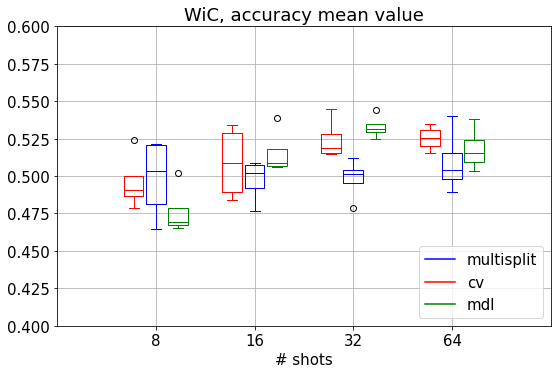

In [401]:

TASK = 'WiC, accuracy mean value'
matplotlib.rcParams.update({'font.size':15})

data_a = [wic['dev32']['8']['mean'], 
             wic['dev32']['16']['mean'], 
             wic['dev32']['32']['mean'], 
             wic['dev32']['64']['mean'], 
            ]

data_b = [wic['cv']['8']['mean'], 
             wic['cv']['16']['mean'], 
             wic['cv']['32']['mean'], 
             wic['cv']['64']['mean'], 
            ]

data_c = [wic['mdl']['8']['mean'], 
             wic['mdl']['16']['mean'], 
             wic['mdl']['32']['mean'], 
             wic['mdl']['64']['mean'], 
            ]


plot_bar(data_a, data_b, data_c)

# ticks = ['8', '16', '32', '64']

# def set_box_color(bp, color):
#     plt.setp(bp['boxes'], color=color)
#     plt.setp(bp['whiskers'], color=color)
#     plt.setp(bp['caps'], color=color)
#     plt.setp(bp['medians'], color=color)

# plt.figure(figsize=(8,5))
# # plt.figure()

# bpc = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0, widths=0.4)
# bpl = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0-0.45, widths=0.4)
# bpr = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.45, widths=0.4)
# # set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
# # set_box_color(bpr, '#2C7BB6')
# set_box_color(bpc, 'b')
# set_box_color(bpl, 'r')
# set_box_color(bpr, 'g')

# # draw temporary red and blue lines and use them to create a legend
# # plt.plot([], c='#D7191C', label='dev32')
# # plt.plot([], c='#2C7BB6', label='cv')

# plt.plot([], c='b', label='multisplit')
# plt.plot([], c='r', label='cv')
# plt.plot([], c='g', label='mdl')

# plt.legend(loc='lower right')

# plt.xticks(range(0, len(ticks) * 2, 2), ticks)
# plt.xlim(-2, len(ticks)*2)
# plt.ylim(0.4, 0.6)
# plt.tight_layout()
# plt.grid()
# plt.title(f"{TASK}, accuracy mean value")
# plt.xlabel('# shots')
# plt.savefig(f"{TASK}.png")

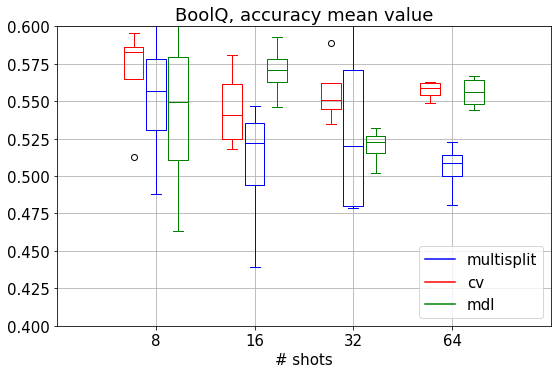

In [402]:
#BoolQ


TASK = 'BoolQ, accuracy mean value'

matplotlib.rcParams.update({'font.size':15})


data = {
    'dev32': {
            '8': {
                'mean': [0.4879, 0.5454, 0.5686, 0.6064],
                'std': [0.0958, 0.06201, 0.05185, 0.02575]
            },
            '16': {
                'mean': [0.532, 0.43922, 0.5464, 0.5119],
                'std': [0.04465, 0.07297, 0.03084, 0.0829]
            },

            '32': {
                'mean': [0.48065, 0.4788, 0.559, 0.6064],
                'std': [0.04757, 0.0461, 0.054, 0.02575]
            },
            '64': {
                'mean': [0.506422, 0.48035, 0.510856, 0.5225535],
                'std': [0.056919, 0.0543496, 0.025548, 0.07731036]
            }
    },
    
    'cv': {
            '8': {
                'mean': [0.51276, 0.5954, 0.583, 0.582],
                'std': [0.0805, 0.0446, 0.026, 0.046]
            },
            '16': {
                'mean': [0.5183, 0.5808, 0.5264, 0.5551],
                'std': [0.0423, 0.0298, 0.0475, 0.0409]
            },

            '32': {
                'mean': [0.553, 0.589, 0.548, 0.535],
                'std': [0.056, 0.034, 0.026, 0.086]
            },
            '64': {
                'mean': [0.561697, 0.5561927, 0.548471, 0.5626911],
                'std': [0.029084, 0.027265, 0.0440519, 0.061017]
            }
    },
    
    'mdl': {
            '8': {
                'mean': [0.572, 0.463, 0.527, 0.601],
                'std': [0.053, 0.105, 0.088, 0.042]
            },
            '16': {
                'mean': [0.568, 0.593, 0.573, 0.546],
                'std': [0.055, 0.028, 0.037, 0.093]
            },

            '32': {
                'mean': [0.532, 0.525, 0.52, 0.502],
                'std': [0.066, 0.039, 0.022, 0.0607]
            },
            '64': {
                'mean': [0.56307339, 0.566513, 0.549694, 0.544266],
                'std': [0.069738, 0.0736753, 0.029377, 0.0198083]
            }
    }
    

}

data_a = [data['dev32']['8']['mean'], 
             data['dev32']['16']['mean'], 
             data['dev32']['32']['mean'], 
             data['dev32']['64']['mean'], 
            ]

data_b = [data['cv']['8']['mean'], 
             data['cv']['16']['mean'], 
             data['cv']['32']['mean'], 
             data['cv']['64']['mean'], 
            ]

data_c = [data['mdl']['8']['mean'], 
             data['mdl']['16']['mean'], 
             data['mdl']['32']['mean'], 
             data['mdl']['64']['mean'], 
            ]

plot_bar(data_a, data_b, data_c)

# ticks = ['8', '16', '32', '64']

# def set_box_color(bp, color):
#     plt.setp(bp['boxes'], color=color)
#     plt.setp(bp['whiskers'], color=color)
#     plt.setp(bp['caps'], color=color)
#     plt.setp(bp['medians'], color=color)

# plt.figure(figsize=(8,5))
# # plt.figure()

# bpc = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0, widths=0.4)
# bpl = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0-0.45, widths=0.4)
# bpr = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.45, widths=0.4)

# set_box_color(bpc, 'b')
# set_box_color(bpl, 'r')
# set_box_color(bpr, 'g')

# plt.plot([], c='b', label='multisplit')
# plt.plot([], c='r', label='cv')
# plt.plot([], c='g', label='mdl')

# plt.legend(loc='lower right')

# plt.xticks(range(0, len(ticks) * 2, 2), ticks)
# plt.xlim(-2, len(ticks)*2)
# plt.ylim(0.4, 0.65)
# plt.tight_layout()
# plt.grid()
# plt.title(f"{TASK}, accuracy mean value")
# plt.xlabel('# shots')

# plt.savefig(f"{TASK}.png")

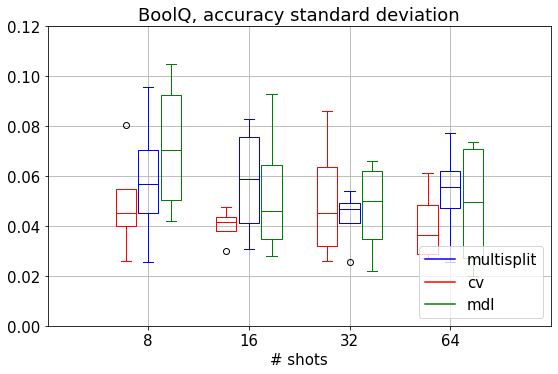

In [403]:
# BoolQ STD

TASK = "BoolQ, accuracy standard deviation"

data_a = [data['dev32']['8']['std'], 
             data['dev32']['16']['std'], 
             data['dev32']['32']['std'], 
             data['dev32']['64']['std'], 
            ]

data_b = [data['cv']['8']['std'], 
             data['cv']['16']['std'], 
             data['cv']['32']['std'], 
             data['cv']['64']['std'], 
            ]

data_c = [data['mdl']['8']['std'], 
             data['mdl']['16']['std'], 
             data['mdl']['32']['std'], 
             data['mdl']['64']['std'], 
            ]


plot_bar(data_a, data_b, data_c, ymin=0, ymax=0.12)

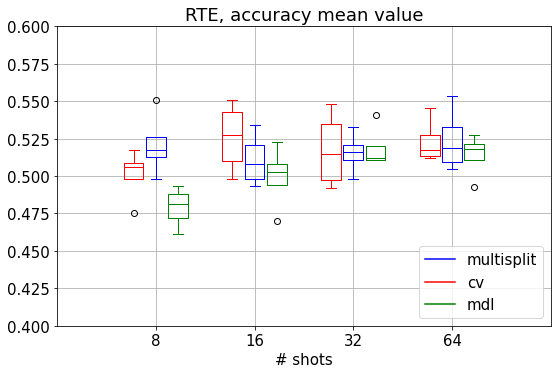

In [404]:
TASK = 'RTE, accuracy mean value'

matplotlib.rcParams.update({'font.size':15})


data = {
    'dev32': {
            '8': {
                'mean': [0.5505, 0.5171, 0.5181, 0.4981],
                'std': [0.0356, 0.0475, 0.03614, 0.03716]
            },
            '16': {
                'mean': [0.5162, 0.5342, 0.493, 0.5],
                'std': [0.05156, 0.0451, 0.0207, 0.042]
            },

            '32': {
                'mean': [0.533, 0.515, 0.498, 0.517],
                'std': [0.041, 0.042, 0.074, 0.059]
            },
            '64': {
                'mean': [0.51083, 0.504512, 0.526173, 0.553249],
                'std': [0.0264467, 0.01297, 0.05987, 0.04747]
            }
    },
    
    'cv': {
            '8': {
                'mean': [0.5171, 0.5063, 0.4756, 0.5054],
                'std': [0.0812, 0.0619, 0.0382, 0.0504]
            },
            '16': {
                'mean': [0.5144, 0.5397, 0.4981, 0.5505],
                'std': [0.0168, 0.0209, 0.0448, 0.0544]
            },

            '32': {
                'mean': [0.5478, 0.5306, 0.4918, 0.499],
                'std': [0.09813, 0.0492, 0.0595, 0.0323]
            },
            '64': {
                'mean': [0.545126, 0.52166, 0.511732, 0.513537],
                'std': [0.056314, 0.053749, 0.047196, 0.03925]
            }
    },
    
    'mdl': {
            '8': {
                'mean': [0.493, 0.486, 0.476, 0.461],
                'std': [0.058, 0.015, 0.054, 0.023]
            },
            '16': {
                'mean': [0.503, 0.523, 0.47, 0.502],
                'std': [0.034, 0.047, 0.038, 0.027]
            },

            '32': {
                'mean': [0.511, 0.511, 0.541, 0.513],
                'std': [0.0669, 0.0018, 0.062, 0.038]
            },
            '64': {
                'mean': [0.516245, 0.519855, 0.52707, 0.492779],
                'std': [0.02166, 0.03487, 0.03006, 0.032087]
            }
    }
    

}

data_a = [data['dev32']['8']['mean'], 
             data['dev32']['16']['mean'], 
             data['dev32']['32']['mean'], 
             data['dev32']['64']['mean'], 
            ]

data_b = [data['cv']['8']['mean'], 
             data['cv']['16']['mean'], 
             data['cv']['32']['mean'], 
             data['cv']['64']['mean'], 
            ]

data_c = [data['mdl']['8']['mean'], 
             data['mdl']['16']['mean'], 
             data['mdl']['32']['mean'], 
             data['mdl']['64']['mean'], 
            ]


plot_bar(data_a, data_b, data_c)

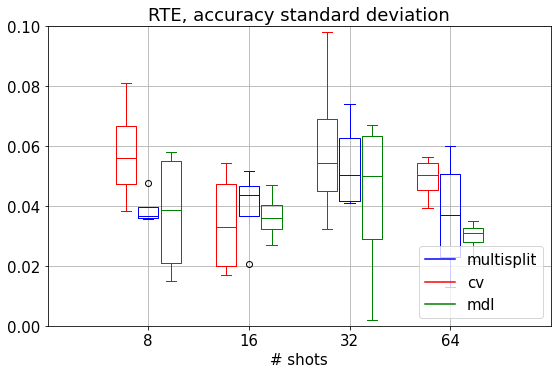

In [405]:
TASK = "RTE, accuracy standard deviation"

data_a = [data['dev32']['8']['std'], 
             data['dev32']['16']['std'], 
             data['dev32']['32']['std'], 
             data['dev32']['64']['std'], 
            ]

data_b = [data['cv']['8']['std'], 
             data['cv']['16']['std'], 
             data['cv']['32']['std'], 
             data['cv']['64']['std'], 
            ]

data_c = [data['mdl']['8']['std'], 
             data['mdl']['16']['std'], 
             data['mdl']['32']['std'], 
             data['mdl']['64']['std'], 
            ]


plot_bar(data_a, data_b, data_c, ymin=0, ymax=0.1)

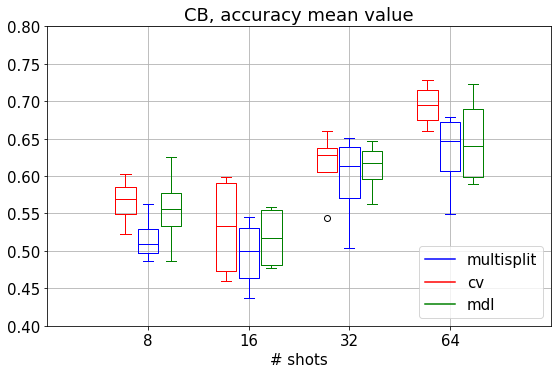

In [406]:
TASK = 'CB, accuracy mean value'

matplotlib.rcParams.update({'font.size':15})


data = {
    'dev32': {
            '8': {
                'mean': [0.5, 0.5625, 0.5178, 0.4866],
                'std': [],
                'f1_mean': [0.3063, 0.38, 0.34, 0.316],
                'f1_std': []
            },
            '16': {
                'mean': [0.4375, 0.5267, 0.5446, 0.4732],
                'std': [],
                'f1_mean': [0.34, 0.3695, 0.3994, 0.3298],
                'f1_std': []
            },

            '32': {
                'mean': [0.504, 0.651, 0.593, 0.6339],
                'std': [],
                'f1_mean': [0.432, 0.514, 0.489, 0.516],
                'f1_std': []
            },
            '64': {
                'mean': [0.625, 0.678571, 0.5491, 0.669642],
                'std': [],
                'f1_mean': [0.49453, 0.553128, 0.431842, 0.567186],
                'f1_std': []
            }
    },
    
    'cv': {
            '8': {
                'mean': [0.6026, 0.558, 0.5223, 0.58],
                'std': [],
                'f1_mean': [0.4024, 0.359, 0.343, 0.3713],
                'f1_std': []
            },
            '16': {
                'mean': [0.46, 0.589, 0.477, 0.598],
                'std': [],
                'f1_mean': [0.347, 0.41, 0.36, 0.409],
                'f1_std': []
            },

            '32': {
                'mean': [0.66, 0.63, 0.625, 0.544],
                'std': [],
                'f1_mean': [0.514, 0.501, 0.494 ,0.464],
                'f1_std': []
            },
            '64': {
                'mean': [0.678571, 0.727678, 0.660714, 0.709821],
                'std': [],
                'f1_mean': [0.578328, 0.587979, 0.500871, 0.565525],
                'f1_std': []
            }
    },
    
    'mdl': {
            '8': {
                'mean': [0.562, 0.625, 0.549, 0.486],
                'std': [],
                'f1_mean': [0.389, 0.418, 0.367, 0.315],
                'f1_std': []
            },
            '16': {
                'mean': [0.477, 0.482, 0.558, 0.553],
                'std': [],
                'f1_mean': [0.327, 0.362, 0.38, 0.381],
                'f1_std': []
            },

            '32': {
                'mean': [0.562, 0.629, 0.607, 0.647],
                'std': [],
                'f1_mean': [0.429, 0.524, 0.442, 0.489],
                'f1_std': []
            },
            '64': {
                'mean': [0.589285, 0.678571, 0.6026, 0.72321],
                'std': [],
                'f1_mean': [0.474296, 0.53881, 0.508739, 0.549991],
                'f1_std': []
            }
    }
    

}

data_a = [data['dev32']['8']['mean'], 
             data['dev32']['16']['mean'], 
             data['dev32']['32']['mean'], 
             data['dev32']['64']['mean'], 
            ]

data_b = [data['cv']['8']['mean'], 
             data['cv']['16']['mean'], 
             data['cv']['32']['mean'], 
             data['cv']['64']['mean'], 
            ]

data_c = [data['mdl']['8']['mean'], 
             data['mdl']['16']['mean'], 
             data['mdl']['32']['mean'], 
             data['mdl']['64']['mean'], 
            ]


plot_bar(data_a, data_b, data_c, ymin=0.4, ymax=0.8)

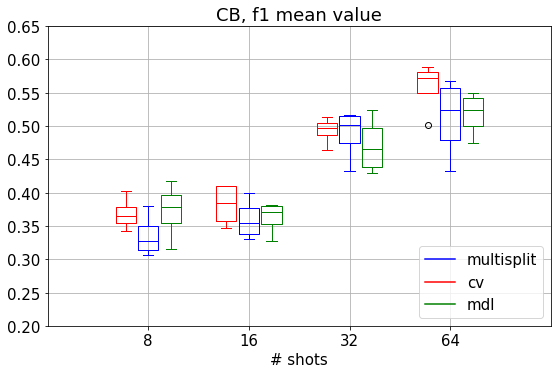

In [407]:
#CB F1 

TASK = 'CB, f1 mean value'

data_a = [data['dev32']['8']['f1_mean'], 
             data['dev32']['16']['f1_mean'], 
             data['dev32']['32']['f1_mean'], 
             data['dev32']['64']['f1_mean'], 
            ]

data_b = [data['cv']['8']['f1_mean'], 
             data['cv']['16']['f1_mean'], 
             data['cv']['32']['f1_mean'], 
             data['cv']['64']['f1_mean'], 
            ]

data_c = [data['mdl']['8']['f1_mean'], 
             data['mdl']['16']['f1_mean'], 
             data['mdl']['32']['f1_mean'], 
             data['mdl']['64']['f1_mean'], 
            ]


plot_bar(data_a, data_b, data_c, ymin=0.2, ymax=0.65)

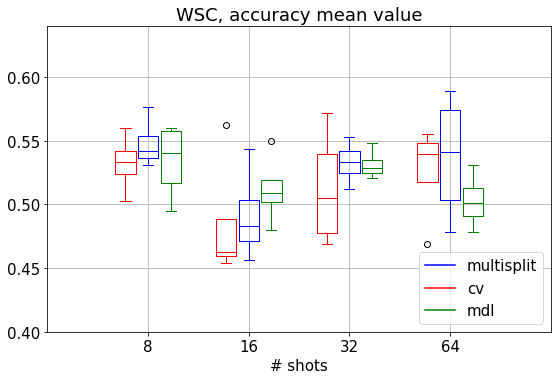

In [408]:
TASK = 'WSC, accuracy mean value'

matplotlib.rcParams.update({'font.size':15})


data = {
    'dev32': {
            '8': {
                'mean': [0.5384, 0.5769, 0.5312, 0.5456],
                'std': [0.109, 0.1218, 0.1181, 0.1165]
            },
            '16': {
                'mean': [0.5432, 0.4567, 0.4903, 0.4759],
                'std': [0.0364, 0.1066, 0.0457, 0.0975]
            },

            '32': {
                'mean': [0.512, 0.5288, 0.5384, 0.5528],
                'std': [0.0733, 0.0732, 0.0925, 0.0328]
            },
            '64': {
                'mean': [0.512, 0.5697, 0.5889, 0.4783],
                'std': [0.0817, 0.0418, 0.0336, 0.0568]
            }
    },
    
    'cv': {
            '8': {
                'mean': [0.56, 0.536, 0.5024, 0.5312],
                'std': [0.062, 0.0432, 0.1141, 0.1027]
            },
            '16': {
                'mean': [0.5625, 0.4615, 0.4543, 0.4639],
                'std': [0.0396, 0.0538, 0.086, 0.069]
            },

            '32': {
                'mean': [0.5721, 0.4807, 0.4687, 0.5288],
                'std': [0.044, 0.087, 0.024, 0.0323]
            },
            '64': {
                'mean': [0.5336, 0.4687, 0.5552, 0.5456],
                'std': [0.08025, 0.08322, 0.0708, 0.0813]
            }
    },
    
    'mdl': {
            '8': {
                'mean': [0.56, 0.557, 0.495, 0.524],
                'std': [0.074, 0.095, 0.089, 0.098]
            },
            '16': {
                'mean': [0.55, 0.48, 0.509, 0.509],
                'std': [0.069, 0.107, 0.097, 0.099]
            },

            '32': {
                'mean': [0.526, 0.521, 0.531, 0.548],
                'std': [0.091, 0.056, 0.099, 0.096]
            },
            '64': {
                'mean': [0.4783, 0.4951, 0.5312, 0.5072],
                'std': [0.0317, 0.0372, 0.0517, 0.0872]
            }
    }
    

}

data_a = [data['dev32']['8']['mean'], 
             data['dev32']['16']['mean'], 
             data['dev32']['32']['mean'], 
             data['dev32']['64']['mean'], 
            ]

data_b = [data['cv']['8']['mean'], 
             data['cv']['16']['mean'], 
             data['cv']['32']['mean'], 
             data['cv']['64']['mean'], 
            ]

data_c = [data['mdl']['8']['mean'], 
             data['mdl']['16']['mean'], 
             data['mdl']['32']['mean'], 
             data['mdl']['64']['mean'], 
            ]


plot_bar(data_a, data_b, data_c, ymin=0.4, ymax=0.64)

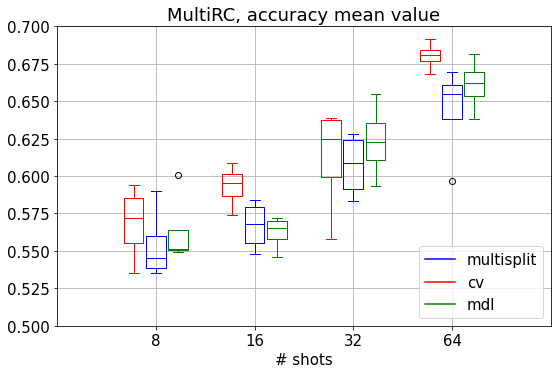

In [409]:
TASK = 'MultiRC, accuracy mean value'

matplotlib.rcParams.update({'font.size':15})


data = {
    'dev32': {
            '8': {
                'mean': [0.54, 0.59, 0.535, 0.55],
                'std': []
            },
            '16': {
                'mean': [0.558, 0.584, 0.548, 0.578],
                'std': []
            },

            '32': {
                'mean': [0.583, 0.623, 0.594, 0.628],
                'std': []
            },
            '64': {
                'mean': [0.5965, 0.66955, 0.6579, 0.65155],
                'std': []
            }
    },
    
    'cv': {
            '8': {
                'mean': [0.562, 0.594, 0.582, 0.535],
                'std': []
            },
            '16': {
                'mean': [0.574, 0.609, 0.591, 0.599],
                'std': []
            },

            '32': {
                'mean': [0.558, 0.637, 0.613, 0.639],
                'std': []
            },
            '64': {
                'mean': [0.68201, 0.668213, 0.6798, 0.6916],
                'std': []
            }
    },
    
    'mdl': {
            '8': {
                'mean': [0.552, 0.551, 0.549, 0.601],
                'std': []
            },
            '16': {
                'mean': [0.569, 0.562, 0.546, 0.572],
                'std': []
            },

            '32': {
                'mean': [0.617, 0.655, 0.593, 0.629],
                'std': []
            },
            '64': {
                'mean': [0.6585, 0.6379, 0.6659, 0.6812],
                'std': []
            }
    }
    

}

data_a = [data['dev32']['8']['mean'], 
             data['dev32']['16']['mean'], 
             data['dev32']['32']['mean'], 
             data['dev32']['64']['mean'], 
            ]

data_b = [data['cv']['8']['mean'], 
             data['cv']['16']['mean'], 
             data['cv']['32']['mean'], 
             data['cv']['64']['mean'], 
            ]

data_c = [data['mdl']['8']['mean'], 
             data['mdl']['16']['mean'], 
             data['mdl']['32']['mean'], 
             data['mdl']['64']['mean'], 
            ]


plot_bar(data_a, data_b, data_c, ymin=0.5, ymax=0.7)

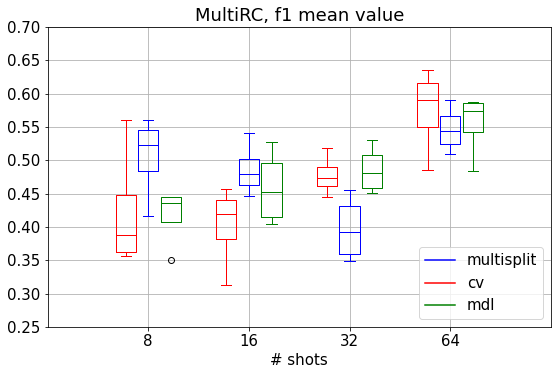

In [410]:
TASK = 'MultiRC, f1 mean value'

matplotlib.rcParams.update({'font.size':15})


data = {
    'dev32': {
            '8': {
                'mean': [0.54, 0.56, 0.507, 0.417],
                'std': []
            },
            '16': {
                'mean': [0.446, 0.49, 0.469, 0.541],
                'std': []
            },

            '32': {
                'mean': [0.423, 0.362, 0.349, 0.456],
                'std': []
            },
            '64': {
                'mean': [0.5589, 0.528734, 0.59045, 0.5095],
                'std': []
            }
    },
    
    'cv': {
            '8': {
                'mean': [0.364, 0.411, 0.357, 0.5599],
                'std': []
            },
            '16': {
                'mean': [0.434, 0.404, 0.457, 0.313],
                'std': []
            },

            '32': {
                'mean': [0.519, 0.445,0.48, 0.467],
                'std': []
            },
            '64': {
                'mean': [0.6353, 0.4851, 0.5721, 0.6093],
                'std': []
            }
    },
    
    'mdl': {
            '8': {
                'mean': [0.445, 0.351, 0.427, 0.445],
                'std': []
            },
            '16': {
                'mean': [0.404, 0.485, 0.419, 0.528],
                'std': []
            },

            '32': {
                'mean': [0.5, 0.53, 0.461, 0.451],
                'std': []
            },
            '64': {
                'mean': [0.5618, 0.5884, 0.5858, 0.4837],
                'std': []
            }
    }
    

}

data_a = [data['dev32']['8']['mean'], 
             data['dev32']['16']['mean'], 
             data['dev32']['32']['mean'], 
             data['dev32']['64']['mean'], 
            ]

data_b = [data['cv']['8']['mean'], 
             data['cv']['16']['mean'], 
             data['cv']['32']['mean'], 
             data['cv']['64']['mean'], 
            ]

data_c = [data['mdl']['8']['mean'], 
             data['mdl']['16']['mean'], 
             data['mdl']['32']['mean'], 
             data['mdl']['64']['mean'], 
            ]


ticks = ['8', '16', '32', '64']

plot_bar(data_a, data_b, data_c, ymin=0.25, ymax=0.7)

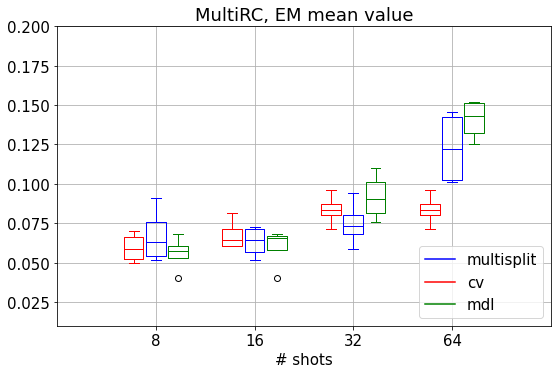

In [412]:
TASK = 'MultiRC, EM mean value'

matplotlib.rcParams.update({'font.size':15})


data = {
    'dev32': {
            '8': {
                'mean': [0.071, 0.091, 0.0553, 0.0516],
                'std': []
            },
            '16': {
                'mean': [0.052, 0.0705, 0.058, 0.0729],
                'std': []
            },

            '32': {
                'mean': [0.076, 0.071, 0.059, 0.094],
                'std': []
            },
            '64': {
                'mean': [0.101259, 0.141658, 0.14533, 0.103095],
                'std': []
            }
    },
    
    'cv': {
            '8': {
                'mean': [0.05, 0.07, 0.053, 0.065],
                'std': []
            },
            '16': {
                'mean': [0.0605, 0.068, 0.0813, 0.0608],
                'std': []
            },

            '32': {
                'mean': [0.0716, 0.084, 0.083, 0.096],
                'std': []
            },
            '64': {
                'mean': [0.0716, 0.084, 0.083, 0.096],
                'std': []
            }
    },
    
    'mdl': {
            '8': {
                'mean': [0.0584, 0.0403, 0.057, 0.068],
                'std': []
            },
            '16': {
                'mean': [0.064, 0.068, 0.04, 0.067],
                'std': []
            },

            '32': {
                'mean': [0.11, 0.098, 0.083, 0.076],
                'std': []
            },
            '64': {
                'mean': [0.1345, 0.1251, 0.1513, 0.1518],
                'std': []
            }
    }
    

}

data_a = [data['dev32']['8']['mean'], 
             data['dev32']['16']['mean'], 
             data['dev32']['32']['mean'], 
             data['dev32']['64']['mean'], 
            ]

data_b = [data['cv']['8']['mean'], 
             data['cv']['16']['mean'], 
             data['cv']['32']['mean'], 
             data['cv']['64']['mean'], 
            ]

data_c = [data['mdl']['8']['mean'], 
             data['mdl']['16']['mean'], 
             data['mdl']['32']['mean'], 
             data['mdl']['64']['mean'], 
            ]


plot_bar(data_a, data_b, data_c, ymin=0.01, ymax=0.2)